### Import the CNN Util and libraries needed
We have the util to make it easy to create and try new variations of the CNN model and be consistent with how we're analyzing and evaluating it.

In [1]:
# Import necessary libraries
import cnn_utils
from keras import layers, models

### Load the data

In [2]:
data_dict = cnn_utils.load_cifar10_from_tar()

Loading CIFAR-10 data...
Loading training batch 1...
Loading training batch 2...
Loading training batch 3...
Loading training batch 4...
Loading training batch 5...
Loading test data...
Raw data loaded successfully!
Training data shape: (50000, 3072)
Test data shape: (10000, 3072)
Label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Preporcess the data

In [3]:
data = cnn_utils.preprocess_data(data_dict)
# Returns: X_train, y_train, X_val, y_val, X_test, y_test, label_names

Preprocessing data...
Preprocessing completed!
Training: (45000, 32, 32, 3), Validation: (5000, 32, 32, 3), Test: (10000, 32, 32, 3)


### Let's do a quick visualization of sample images (to also ensure we still have the correct shape)

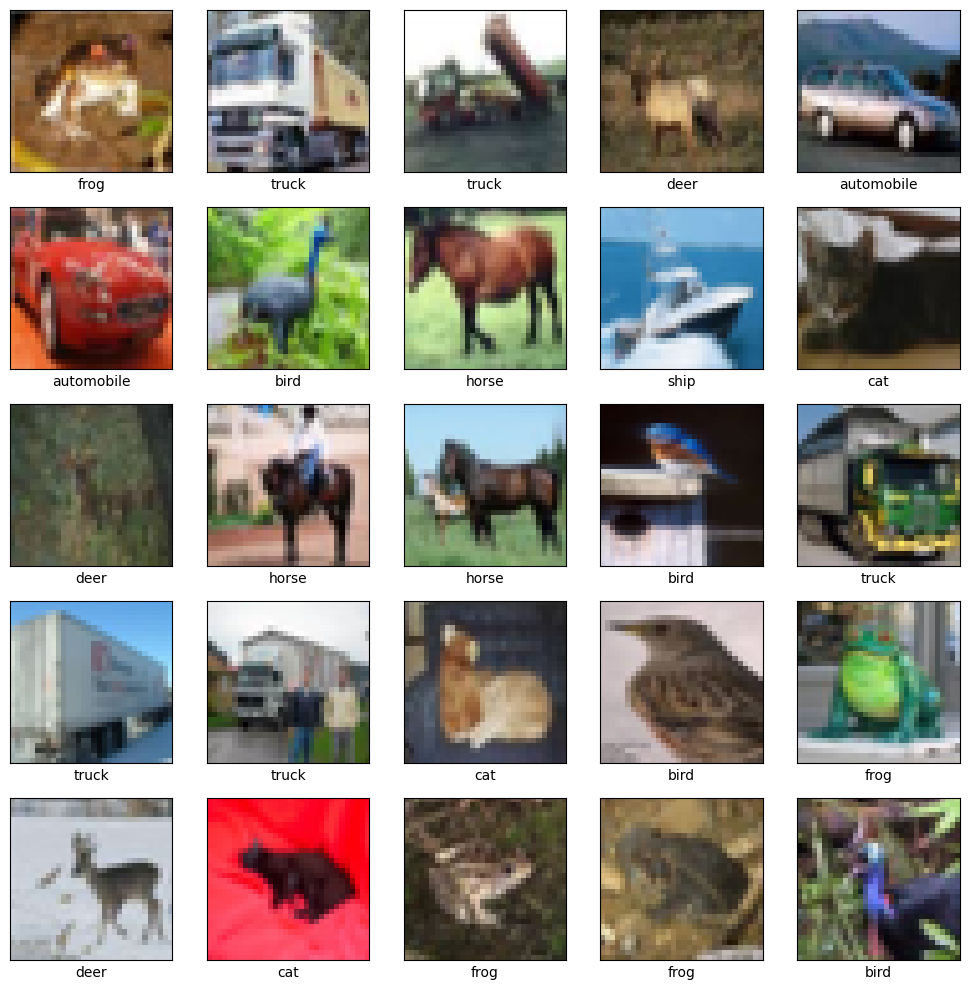

In [4]:
cnn_utils.visualize_data_samples(data)


### Let's define our CNN model (architect)
- 
- 


In [ ]:
# Define the CNN model architecture
def create_cnn_model(num_classes=10):
    """Create a simpler CNN model as a foundation"""
    model = models.Sequential()
    
    # First convolutional block
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second convolutional block
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model


In [12]:
model = create_cnn_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_utils.print_model_summary(model)


MODEL ARCHITECTURE


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)


📊 Total Parameters: 545,098


### Now let's train the model

In [13]:
history = cnn_utils.train_model(model, data, augmentation=None)


Starting model training...
Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.2889 - loss: 1.9196 - val_accuracy: 0.5230 - val_loss: 1.3468
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4640 - loss: 1.4680 - val_accuracy: 0.5702 - val_loss: 1.2485
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5306 - loss: 1.3138 - val_accuracy: 0.6202 - val_loss: 1.0827
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5705 - loss: 1.2073 - val_accuracy: 0.6368 - val_loss: 1.0396
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5949 - loss: 1.1403 - val_accuracy: 0.6672 - val_loss: 0.9576
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6097 - loss: 1.0930 - val_accuracy: 0.6838 - val_loss: 0.9099
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6280 - loss: 1.0331 - val_accuracy: 0.6946 - val_loss: 0.8896
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.64

### Let's show the evaluation result

MODEL EVALUATION


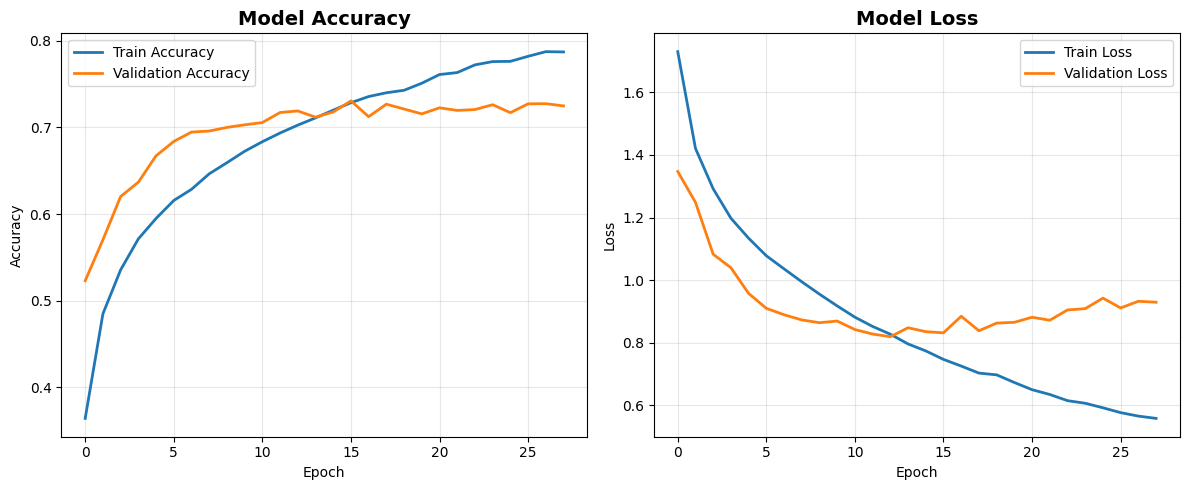


🎯 Final Test Results:
   Test Accuracy: 0.7104
   Test Loss: 0.8495

📊 Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.79      0.75      1000
  automobile       0.83      0.83      0.83      1000
        bird       0.62      0.57      0.59      1000
         cat       0.49      0.54      0.52      1000
        deer       0.71      0.60      0.65      1000
         dog       0.60      0.64      0.62      1000
        frog       0.74      0.81      0.77      1000
       horse       0.81      0.73      0.77      1000
        ship       0.84      0.81      0.82      1000
       truck       0.79      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



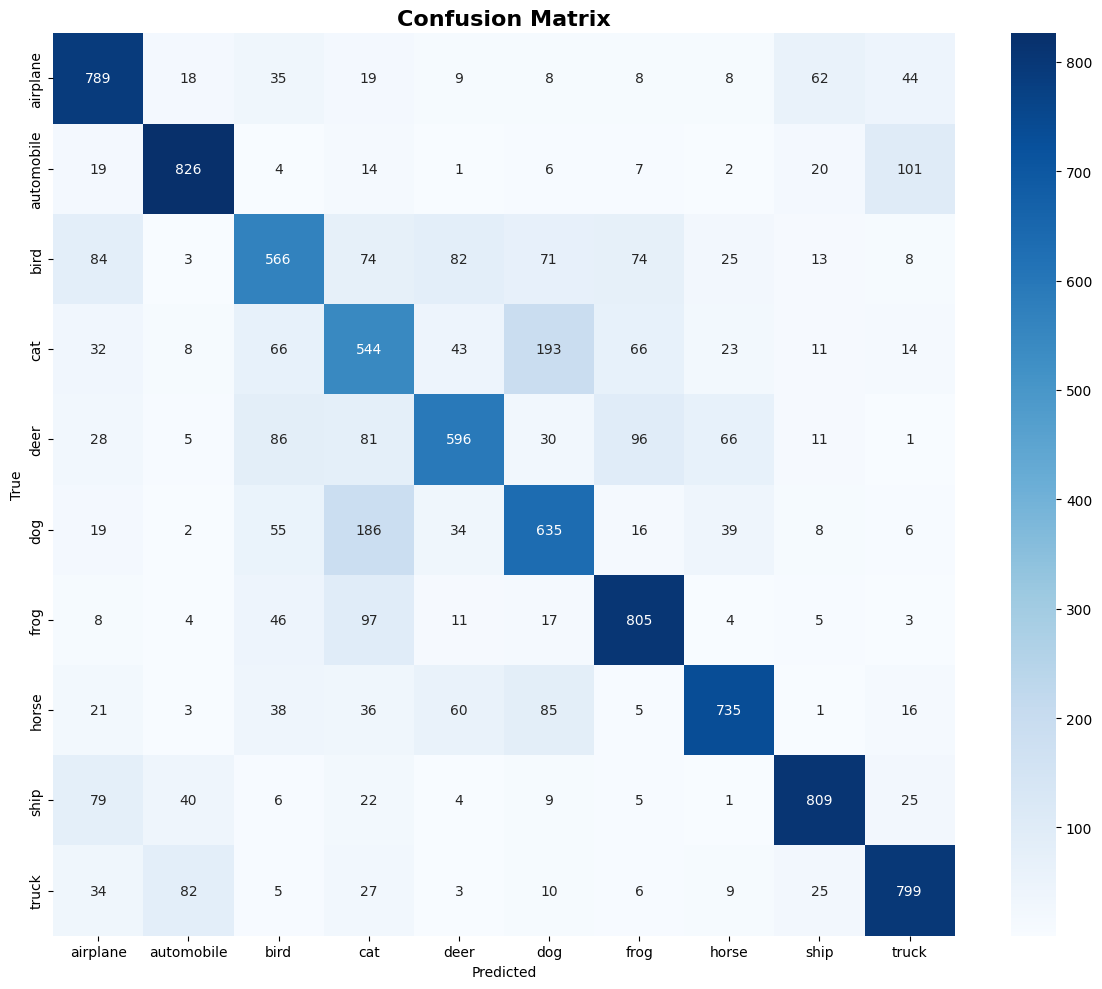

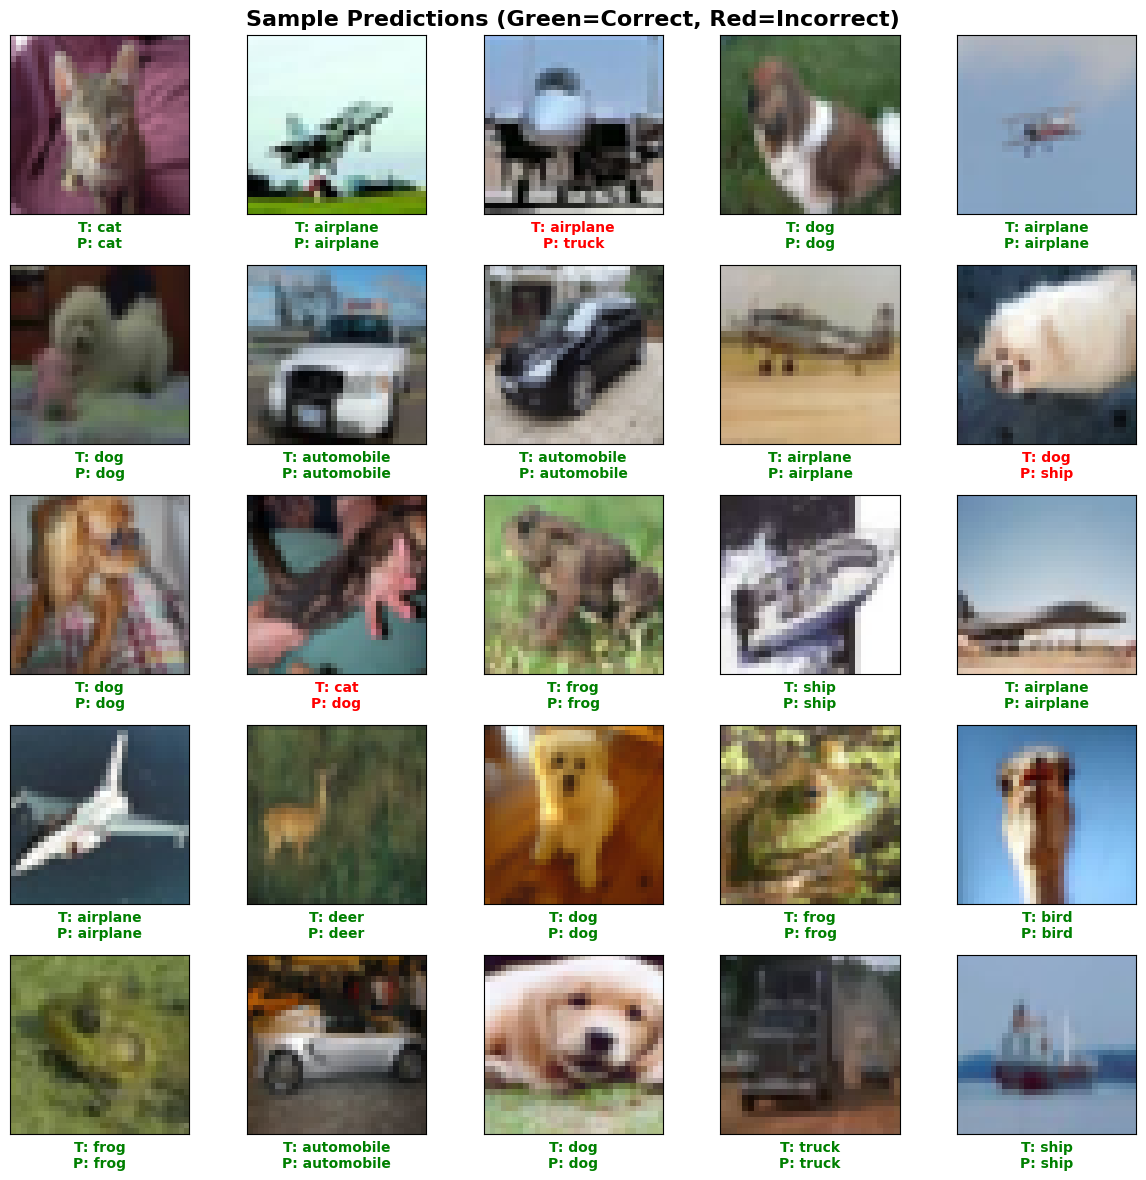

In [15]:
cnn_utils.evaluate_model(model, data, history)